In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *

%load_ext autoreload
%autoreload 2

In [6]:
def least_squares(y, tx):
    w = np.linalg.lstsq(tx.T @ tx, tx.T @ y, rcond=None)[0]
    res = y - tx @ w
    mse = res.T @ res / (2 * len(y))

    return w, mse

test_y = np.array([0.1, 0.3, 0.5])
test_x = np.array([[2.3, 3.2], [1.0, 0.1], [1.4, 2.3]])
test_res_w, test_res_mse = least_squares(test_y, test_x)
print(test_res_w, test_res_mse)
np.testing.assert_allclose(test_res_w, np.array([0.218786, -0.053837]), rtol=1e-4, atol=1e-8)
np.testing.assert_allclose(test_res_mse, 0.026942, rtol=1e-4, atol=1e-8)

[ 0.2187858  -0.05383734] 0.026941580756013744


In [7]:
# load dataset
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("data/dataset_to_release")

In [8]:
mean = np.nanmean(x_train, axis=0)

# Loop through each column
for col in range(x_train.shape[1]):
    nan_mask = np.isnan(x_train[:, col])
    x_train[nan_mask, col] = mean[col]

x_train.shape, y_train.shape, x_train[0,:], y_train[2]

((328135, 321),
 (328135,),
 array([5.30000000e+01, 1.10000000e+01, 1.11620150e+07, 1.10000000e+01,
        1.60000000e+01, 2.01500000e+03, 1.10000000e+03, 2.01501563e+09,
        2.01501563e+09, 1.00000000e+00, 1.00016956e+00, 1.00000000e+00,
        1.00000000e+00, 1.54463226e+00, 1.65625000e+00, 1.79388666e+00,
        8.01570428e-01, 9.91935740e-01, 1.00000000e+00, 1.00000000e+00,
        2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 2.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        5.00000000e+00, 8.80000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.00000000e+00, 1.00000000e+00, 3.00000000e+00, 1.17256318e+00,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 2.00000000e+00,
        2.00000000e+00, 1.48319767e+00, 2.00000000e+00, 2.00000000e+00,
        2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        3.00000000e+00, 5.44746802e+01, 2.00000000e+00, 1.00000000e+00,
        5.00000000e+00, 1.00000000e+

In [9]:
def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x)
    x = x - mean_x
    std_x = np.std(x)
    x = x / std_x
    return x, mean_x, std_x

In [10]:
x_train, mean_x, std_x = standardize(x_train)
x_train[3, :]

array([-0.07932676, -0.07932699, -0.04033713, -0.07932699, -0.07932691,
       -0.07931432, -0.07932009, 12.6292844 , 12.6292844 , -0.07932702,
       -0.07932702, -0.07932702, -0.07932702, -0.07932701, -0.07932701,
       -0.07932701, -0.07932702, -0.07932702, -0.07932702, -0.07932702,
       -0.07932701, -0.07932702, -0.07932702, -0.07932702, -0.07932701,
       -0.07932701, -0.07932702, -0.07932647, -0.07932647, -0.07932667,
       -0.07932702, -0.07932702, -0.07932701, -0.07932702, -0.07932701,
       -0.07932702, -0.07932702, -0.079327  , -0.07932701, -0.07932701,
       -0.07932701, -0.07932702, -0.07932701, -0.07932701, -0.07932701,
       -0.07932702, -0.07932701, -0.07932701, -0.07932701, -0.07932668,
       -0.07932701, -0.07932702, -0.079327  , -0.07932702, -0.07932701,
       -0.07932701, -0.07932702, -0.07932701, -0.07932698, -0.07932647,
       -0.0793264 , -0.07932701, -0.07932597, -0.07932384, -0.07932701,
       -0.07932701, -0.07932701, -0.07932701, -0.07932701, -0.07

In [62]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        degree: integer.

    Returns:
        poly: numpy array of shape (N,d+1)

    >>> build_poly(np.array([0.0, 1.5]), 2)
    array([[1.  , 0.  , 0.  ],
           [1.  , 1.5 , 2.25]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    N, D = x.shape
    poly = np.zeros((N, D * (degree + 1)))

    for j in range(degree + 1):
        poly[:, j * D:(j + 1) * D] = x ** j

    return poly


In [75]:
def build_model_data(x, y, degree=1):
    poly = build_poly(x, degree)
    return least_squares(y, poly)

Degree:  0 MSE:  0.15634501536218667
Degree:  1 MSE:  0.15564856695940002
Degree:  2 MSE:  0.1560884665287357
Degree:  3 MSE:  0.15634180641591786
Degree:  4 MSE:  0.15634268386214675
Degree:  5 MSE:  0.15634479601234386
Degree:  6 MSE:  0.15634475209501694
Degree:  7 MSE:  0.1563447081803827
Degree:  8 MSE:  0.156344664268441
Degree:  9 MSE:  0.1563446203591918


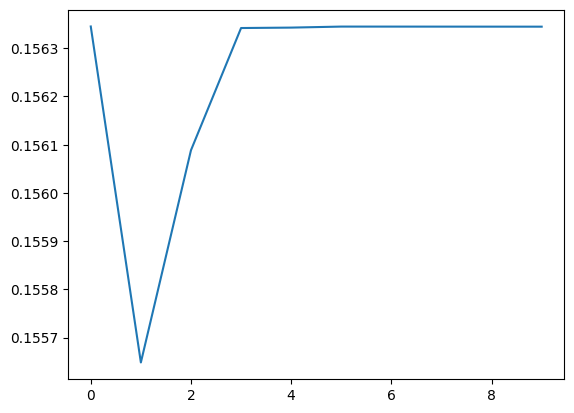

In [87]:
mes = []
for i in range(10):
    w, mse = build_model_data(x_train, y_train, i)
    print("Degree: ", i, "MSE: ", mse)
    mes.append(mse)
    
# Plot mses
plt.plot(mes)

In [76]:
corr_matrix = np.corrcoef(x_train, rowvar=False)
corr_matrix

array([[ 1.        , -0.01588791, -0.01676268, ..., -0.01306274,
        -0.00722304, -0.01533169],
       [-0.01588791,  1.        ,  0.87082434, ...,  0.03961271,
         0.03223985, -0.02260416],
       [-0.01676268,  0.87082434,  1.        , ...,  0.04534796,
         0.0369845 , -0.017137  ],
       ...,
       [-0.01306274,  0.03961271,  0.04534796, ...,  1.        ,
         0.83828419, -0.00606087],
       [-0.00722304,  0.03223985,  0.0369845 , ...,  0.83828419,
         1.        ,  0.01780459],
       [-0.01533169, -0.02260416, -0.017137  , ..., -0.00606087,
         0.01780459,  1.        ]])

In [11]:
y_class = np.expand_dims(y_train, axis=1)
y_class[y_class == -1] = 0
y_class

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# Logistic Regression using gradient descent or SGD

In [12]:
def sigmoid(t):
    """apply sigmoid function on t.

    Args:
        t: scalar or numpy array

    Returns:
        scalar or numpy array

    >>> sigmoid(np.array([0.1]))
    array([0.52497919])
    >>> sigmoid(np.array([0.1, 0.1]))
    array([0.52497919, 0.52497919])
    """
    return 1 / (1 + np.exp(-t))

In [13]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a non-negative loss

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(4).reshape(2, 2)
    >>> w = np.c_[[2., 3.]]
    >>> round(calculate_loss(y, tx, w), 8)
    1.52429481
    """
    assert y.shape[0] == tx.shape[0]
    assert tx.shape[1] == w.shape[0]

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    N = y.shape[0]
    loss = -1/N * np.sum(y * np.log(sigmoid(tx @ w)) + (1 - y) * np.log(1 - sigmoid(tx @ w)))
    return loss

In [14]:
import random
def calculate_gradient_sgd(y, tx, w):
    """compute the gradient of loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a vector of shape (D, 1)
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    index = random.randint(0, y.shape[0] - 1)
    xn = tx[index, :]
    yn = y[index, :]
    return xn * (sigmoid(xn @ w) - yn)

def calculate_gradient(y, tx, w):
    """compute the gradient of loss.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)

    Returns:
        a vector of shape (D, 1)

    >>> np.set_printoptions(8)
    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> calculate_gradient(y, tx, w)
    array([[-0.10370763],
           [ 0.2067104 ],
           [ 0.51712843]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    N = y.shape[0]
    return 1/N * tx.T @ (sigmoid(tx @ w) - y)

def calculate_gradient_mb(y, tx, w, batch_size=30):
    batch_indices = random.sample(range(y.shape[0]), batch_size)
    X = tx[batch_indices]
    Y = y[batch_indices]
    N = len(batch_indices)
    return 1/N * X.T @ (sigmoid(X @ w) - Y)

In [61]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression. Return the loss and the updated w.

    Args:
        y:  shape=(N, 1)
        tx: shape=(N, D)
        w:  shape=(D, 1)
        gamma: float

    Returns:
        loss: scalar number
        w: shape=(D, 1)

    >>> y = np.c_[[0., 1.]]
    >>> tx = np.arange(6).reshape(2, 3)
    >>> w = np.array([[0.1], [0.2], [0.3]])
    >>> gamma = 0.1
    >>> loss, w = learning_by_gradient_descent(y, tx, w, gamma)
    >>> round(loss, 8)
    0.62137268
    >>> w
    array([[0.11037076],
           [0.17932896],
           [0.24828716]])
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient_mb(y, tx, w)
    return loss, w - gamma * gradient

In [67]:
def logistic_regression_gradient_descent_demo(y, x, max_iter=10000, threshold=1e-12, gamma=0.1, initial_w=None):
    losses = []

    # build tx
    #tx = np.c_[np.ones((y.shape[0], 1)), x]
    #w = np.zeros((tx.shape[1], 1)) if initial_w is None else np.append(initial_w, 1.0)
    tx = x
    w = np.zeros((tx.shape[1], 1)) if initial_w is None else initial_w

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
        
    loss = calculate_loss(y, tx, w)
    print("loss={l}".format(l=loss))
    
    # plot losses
    plt.plot(losses)
    return w, loss

Current iteration=0, loss=0.6931471805599446
Current iteration=100, loss=0.3862372738748363
Current iteration=200, loss=0.35623972149572486
Current iteration=300, loss=0.33152564057473083
Current iteration=400, loss=0.694776329246456
Current iteration=500, loss=0.29892441622995575
Current iteration=600, loss=0.3330426124800829
Current iteration=700, loss=0.30887168859875314
Current iteration=800, loss=2.3438013168401826
Current iteration=900, loss=0.5483766427231073
Current iteration=1000, loss=0.409426715174507
Current iteration=1100, loss=0.43277290632145926
Current iteration=1200, loss=1.52701869669668
Current iteration=1300, loss=1.1267776972984154
Current iteration=1400, loss=1.2801844945425194
Current iteration=1500, loss=0.29878770771082114
Current iteration=1600, loss=0.3024599031903164
Current iteration=1700, loss=0.29920850590980397
Current iteration=1800, loss=0.4139884225606172
Current iteration=1900, loss=0.809937352198742
Current iteration=2000, loss=0.6270491516713926
Cu

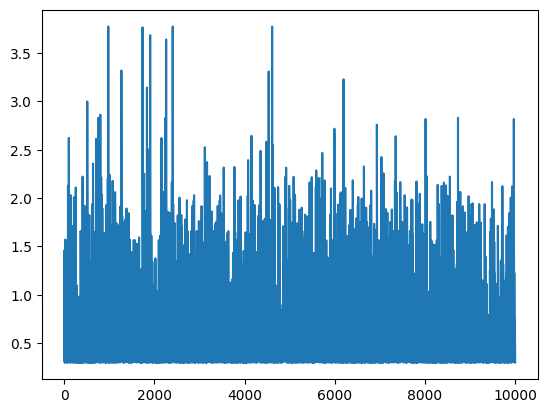

In [68]:
w = logistic_regression_gradient_descent_demo(y_class, x_train)

In [70]:
w

(array([[-0.00038847],
        [-0.00038863],
        [ 0.03493767],
        [-0.00038863],
        [-0.00038902],
        [-0.00038861],
        [-0.00038975],
        [ 0.06150474],
        [ 0.06150474],
        [-0.00038867],
        [-0.00038867],
        [-0.00038867],
        [-0.00038867],
        [-0.00038867],
        [-0.00038867],
        [-0.00038873],
        [-0.00038869],
        [-0.00038871],
        [-0.00038867],
        [-0.00038867],
        [-0.00038869],
        [-0.00038867],
        [-0.00038867],
        [-0.00038868],
        [-0.00038869],
        [-0.00038871],
        [-0.00038818],
        [-0.00039519],
        [-0.00038923],
        [-0.00039106],
        [-0.00038869],
        [-0.00038873],
        [-0.00038868],
        [-0.0003888 ],
        [-0.00038904],
        [-0.0003887 ],
        [-0.00038875],
        [-0.00038879],
        [-0.00038881],
        [-0.00038873],
        [-0.0003887 ],
        [-0.00038868],
        [-0.00038871],
        [-0

Current iteration=0, loss=1.6162998438550205
loss=1.3483578175129307


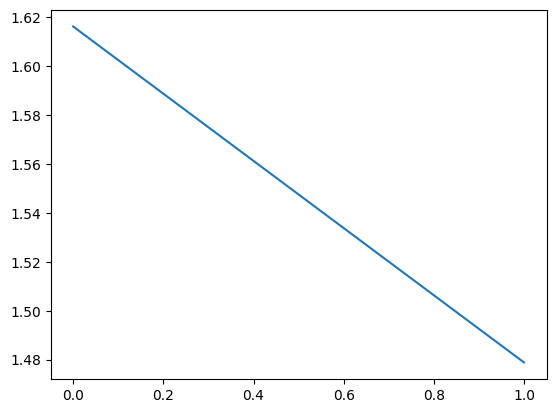

In [59]:
testing_x = np.array([[2.3, 3.2], [1.0, 0.1], [1.4, 2.3]])
testing_y = np.array([0.1, 0.3, 0.5])
testing_y = (testing_y > 0.2) * 1.0
testing_init_w = np.array([0.5, 1.0])
testing_res_w, testing_res_loss = logistic_regression_gradient_descent_demo(testing_y, testing_x, max_iter=2, gamma=0.1, initial_w=testing_init_w, threshold=1.0)

expected_loss = 1.348358
expected_w = np.array([0.378561, 0.801131])

np.testing.assert_allclose(testing_res_loss, expected_loss, rtol=1e-4, atol=1e-8)
np.testing.assert_allclose(testing_res_w, expected_w, rtol=1e-4, atol=1e-8)
assert testing_res_loss.ndim == 0
assert testing_res_w.shape == expected_w.shape